In [7]:
%matplotlib inline

In [6]:
import warnings
import datetime

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from IPython.display import display, Markdown , Math 

sns.set()
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

In [1]:
def printmd(string): display(Markdown(string))
def latex(out): printmd(f'{out}')  
def pr(string): printmd('***{}***'.format(string))

<h2>
  <p>
    <a href =   "https://github.com/daodavid" > 
       <img src="https://cdn.thenewstack.io/media/2014/12/github-octocat.png" align="left" width="120"  alt="daodavid" >
    </a>
    <font face = "Times New Roma" size="4"  color='#270336'>
        author: daodeiv (David Stankov) 
    </font>
</p>      
</h2>  

<h6>
  <font size="4" face = "Times New Roma" color='#3f134f' > 
    <ul style="margin-left: 30px">
      <li><a href='#abstract'>Abstract </a> </li> <br>
      <!--<li><a href='#int-1'>Introduction </a> </li><br> -->
      <li><a href='#operator'>Linear operator</a> </li><br>
      <li><a href='#cross_entropy'>Cross-entropy Loss</a> </li><br>  
      <li><a href='#optimization'>Optimization of softmax by Cross-entropy Loss and derivation of Gradient descent formula </a> </li><br>
       <li><a href='#gradient'>Implementation of Gradient descent algorithm </a> </li><br> 
      <li><a href='#reg'>Regularization of gradient descent by learning rate and max iterations</a> </li><br>     
       <li><a href='#conclusion'>Conclusion</a> </li><br>  
        
</ul>    
 </font>
  </h6>

<font size="1" id="operator">... </font> 
<h2 face = "Times New Roma" color='#270336' >&nbsp; Linear operator</h2>


<font size="4" color='#270336' face = "Times New Roma">
     deff : The operator A acts on linear space $L^n$ is linear if for every x,y $\in $ $L^n$ and $\gamma x,\beta \in R $ is  satify $A(\gamma x+ \beta y)=\gamma A(x) + \beta A(y)$ <br>
    For the linear operators satify the folowong acsions : <br> 
</font>
    

 <font size="5" id="deff_softmax" color='#4a3e20'>
    $$ for\; every\; opeararos\; A,B\; \gamma \;in \;R $$
    $$(A + B)r  = Ar + Br $$
    $$ \gamma (A + B)  =  \gamma A+   \gamma B $$
    $$ \gamma (AB)r  =  A(Br) $$
    $$ exists \; I \; such\;that\;IA=AI=A $$
</font>

<font size="4" color='#270336' face = "Times New Roma"> 
example : <br>
    let $ A = \begin{pmatrix} 
a & b & c \\
c & d & d\\
e & f & g \\
\end{pmatrix}$

In [4]:
def cartesian_product(x,y):
    """
    retrun catesian product
    """
    return np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))])



class VectorGround:
    def __init__(self, range=[-3,10], fig_size=(20,20),**kwargs):
        self.plt = plt
        self.range=range
        self.ax = self.plt.gca()
        self.ax.set_aspect('equal')
        plt.grid()
        self.ax.arrow(0, 0, 1, 0, head_width=0.1, head_length=0.1, fc='blue', ec='black')
        self.ax.arrow(0, 0, 0, 1, head_width=0.1, head_length=0.1, fc='blue', ec='black')

        self.ax.text(1, -0.3, r'$\vec{e}_1$',fontsize=16,color='red')
        self.ax.text(-0.4, 1, r'$\vec{e}_2$',fontsize=16,color='red')
        self.plt.xlim(range[0],range[1])
        self.plt.ylim(range[0],range[1])
        self.ax.set_xlabel('X',fontsize=30)
        
        self.ax.set_ylabel('Y',fontsize=30)
        self.plt.title('',fontsize=10)

        self.plt.savefig('fig1.png', bbox_inches='tight')
    
    def add_v(self,x_0,y_0,x,y,index='1',show_cord=True,font_size=15):
        self.ax.arrow(x_0, y_0, x, y, head_width=0.1, head_length=0.1, fc='black', ec='black')
    
        if show_cord:
            #self.ax.text(x, y-0.2, r'$\vec{r}_{%s}(%1.1f:%1.1f)$' % (index,x, y),fontsize=font_size,color='blue')
            self.ax.text(x, y-0.2, r'$\vec{r}_{%s}(%1.f:%1.f)$' % (index,x, y),fontsize=font_size,color='blue')
    def plot_points(self,points,color='b'):
        for p in points:
            self.plt.scatter(p[0],p[1],color=color)

<class 'numpy.ndarray'>
(81, 2)


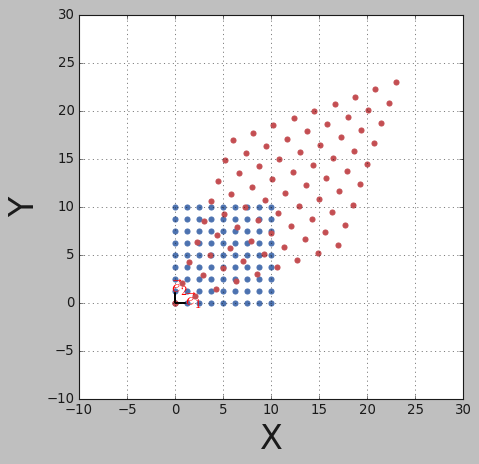

In [7]:
x_args=y_args = np.linspace(0,10,9)
points = np.meshgrid(x_args,y_args)
result = cartesian_product(x_args,y_args)
print(type(result))

g = VectorGround(range=[-10,30])



def linear_tranformation(points,matrix):
    sh = points.shape
    print(sh)
    A = np.array([0,0])
    for i in points[:][:]:
        row = matrix.dot(i)
        A=np.vstack([A, row])
    return A

g.plot_points(result)
new_points = linear_tranformation(result,np.array([[1.7,0.6],[0.6,1.7]]))  
g.plot_points(new_points,color='r')

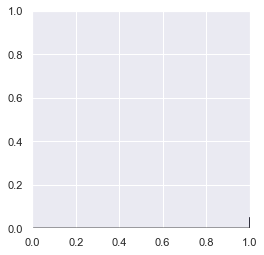

<Figure size 1440x1440 with 0 Axes>

In [64]:
ax = plt.gca()
plt.figure(figsize=[20,20])
ax.set_aspect('equal')
#plt.grid()
ax.arrow(0, 0, 1, 0, head_width=0.1, head_length=0.1, fc='blue', ec='black')
ax.arrow(0, 0, 0, 1, head_width=1, head_length=0.1, fc='blue', ec='black')